In [60]:
import pandas as pd
productSales = pd.read_csv("C:/Users/BlewOs/EBAC/productSales.csv")
productSales.head()

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,...,BRAND,ITEM_DESCRIPTION,CATEGORY,CATEGORY_NAME,FORMAT1,FORMAT2,ATTR1,ATTR2,ATTR3,SEGMENT
0,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
1,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
2,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH
3,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,GEL,CLORO,CLORO,CLORO,BLEACH
4,01-22,2022,1,1,2022-01-09,7501268200001,0.003,0.027,3.0,TOTAL AUTOS AREA 1,...,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,1,FABRIC TREATMENT and SANIT\r\n,LIQUIDO,LIQUIDO,CLORO,CLORO,CLORO,BLEACH


In [61]:
productSales.columns

Index(['WEEK', 'YEAR', 'MONTH', 'WEEK_NUMBER', 'DATE', 'ITEM',
       'TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES',
       'REGION', 'MANUFACTURER', 'BRAND', 'ITEM_DESCRIPTION', 'CATEGORY',
       'CATEGORY_NAME', 'FORMAT1', 'FORMAT2', 'ATTR1', 'ATTR2', 'ATTR3',
       'SEGMENT'],
      dtype='object')

In [62]:
categories = productSales["YEAR"].unique()
print(categories)

[2022 2023]


In [63]:
# Data frame contiene datos de dos años, 2022 y 2023, filtrando para mejor visualizacion
productSales22 = productSales[productSales["YEAR"] == 2022]
productSales23 = productSales[productSales["YEAR"] == 2023]

C:\Users\BlewOs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


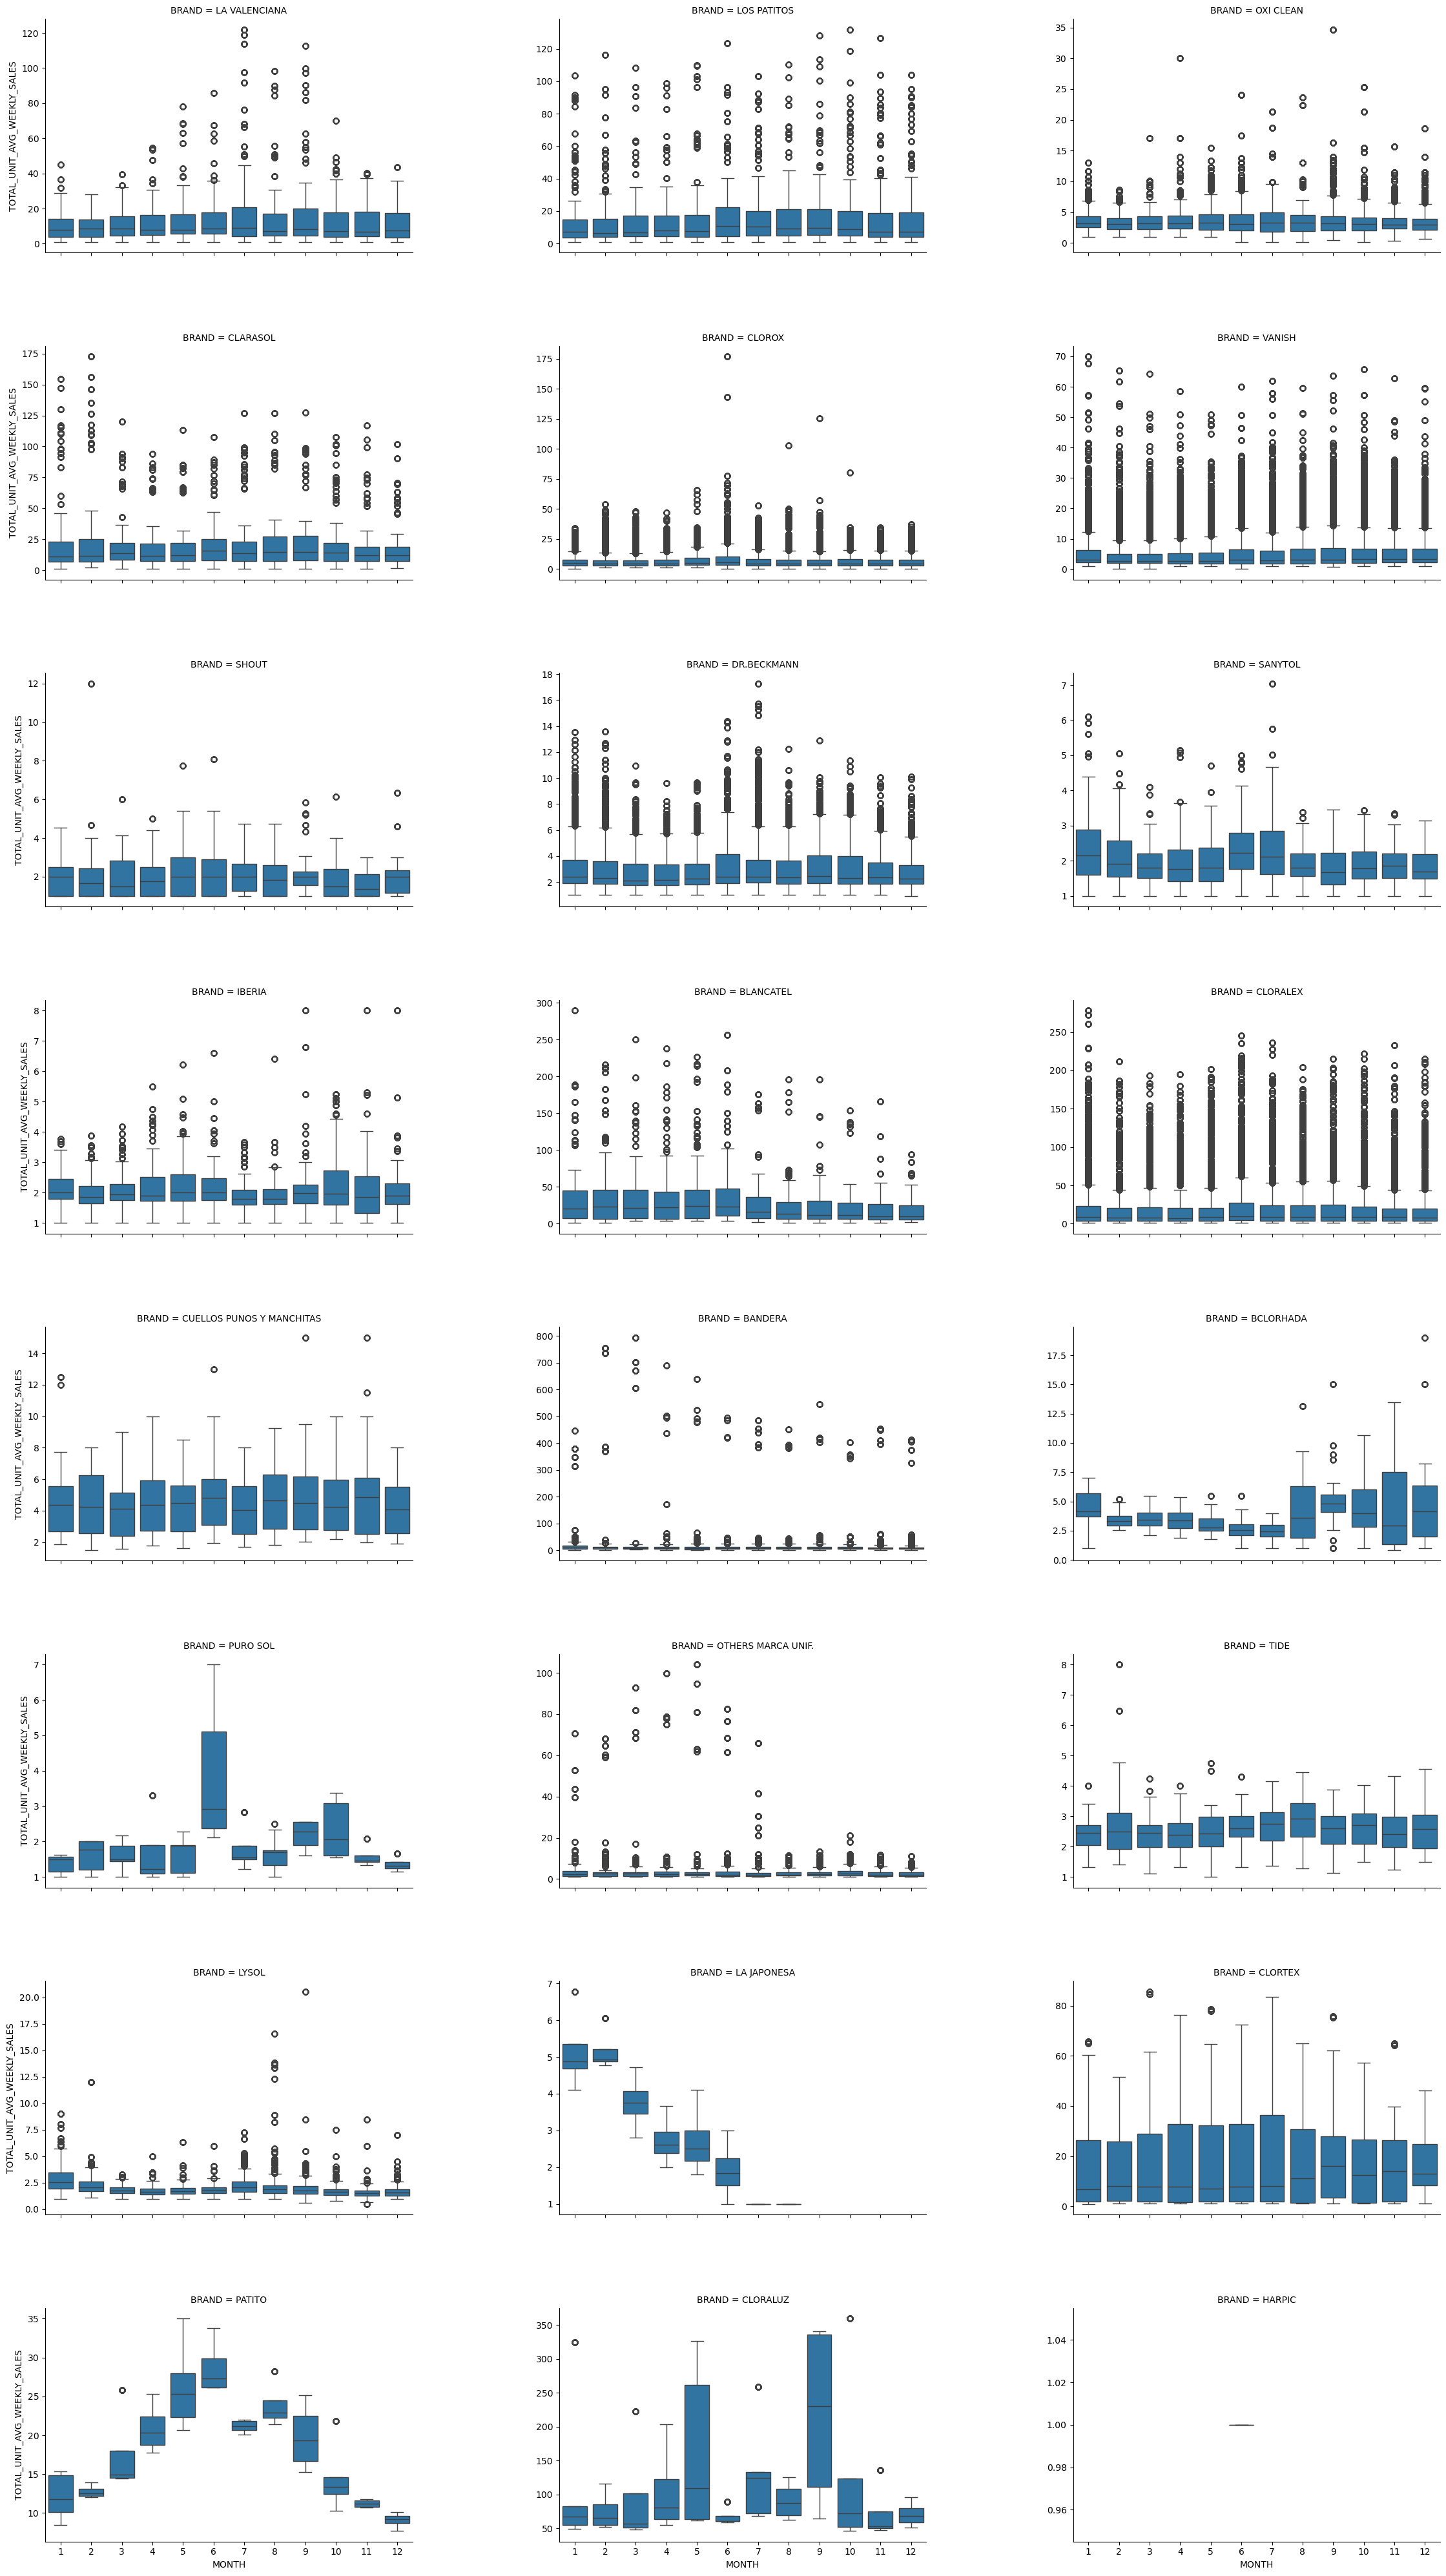

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

graf = sns.FacetGrid(productSales22, col = "BRAND", height=5, aspect=1.5, col_wrap=3, sharey=False)
graf.map(sns.boxplot, "MONTH", "TOTAL_UNIT_AVG_WEEKLY_SALES")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("AVGSalesMont22.png", dpi=300, bbox_inches="tight")

C:\Users\BlewOs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


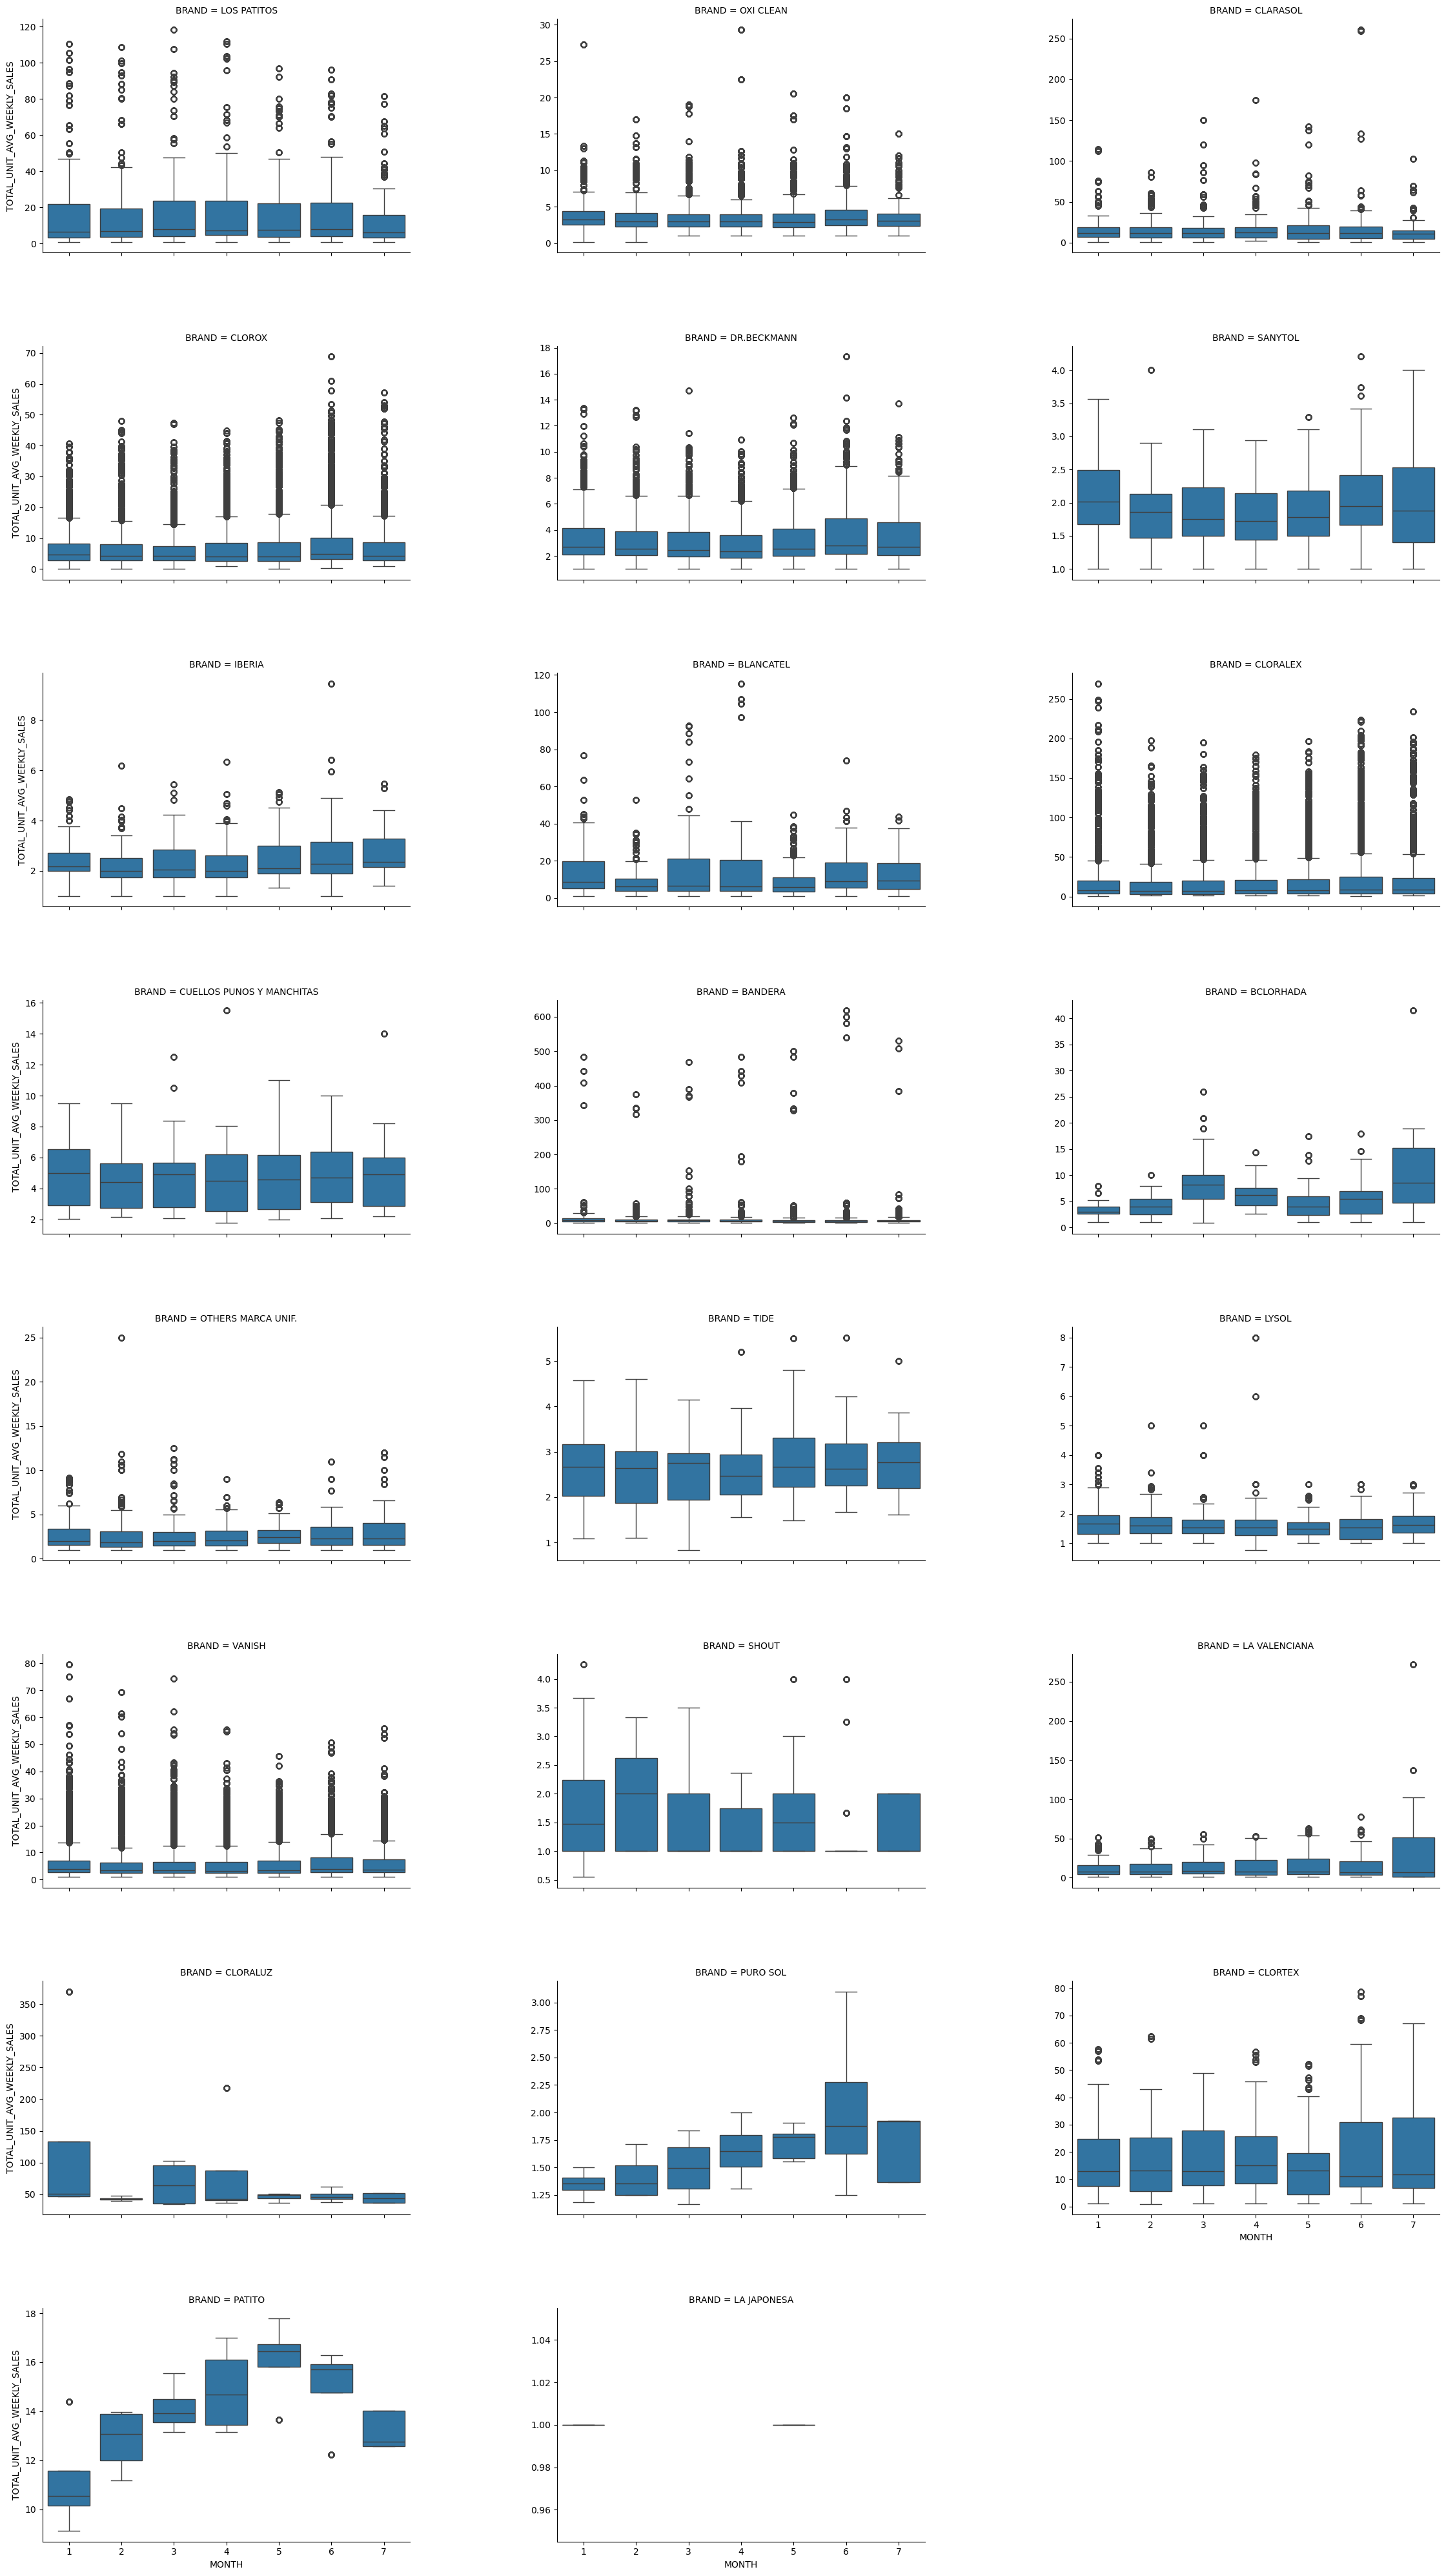

In [65]:
graf = sns.FacetGrid(productSales23, col = "BRAND", height=5, aspect=1.5, col_wrap=3, sharey=False)
graf.map(sns.boxplot, "MONTH", "TOTAL_UNIT_AVG_WEEKLY_SALES")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("AVGSalesMont23.png", dpi=300, bbox_inches="tight")

# En base a los resultados obtenidos se puede determinar que media de los productos vendidos se mantienen a lo largo del año a excepcion de ciertas marcas especificas como "Patito", "Clorazul", tambien se puede aprecial la desaparcion o falta de datos de las marcas "La japonesa" y " Harpic"


C:\Users\BlewOs\AppData\Local\Temp\ipykernel_36132\3911919009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productSales22['Ventas_Acumuladas'] = productSales22.groupby(['MONTH', 'BRAND'])['TOTAL_UNIT_SALES'].cumsum()
C:\Users\BlewOs\AppData\Local\Temp\ipykernel_36132\3911919009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productSales23['Ventas_Acumuladas'] = productSales23.groupby(['MONTH', 'BRAND'])['TOTAL_UNIT_SALES'].cumsum()


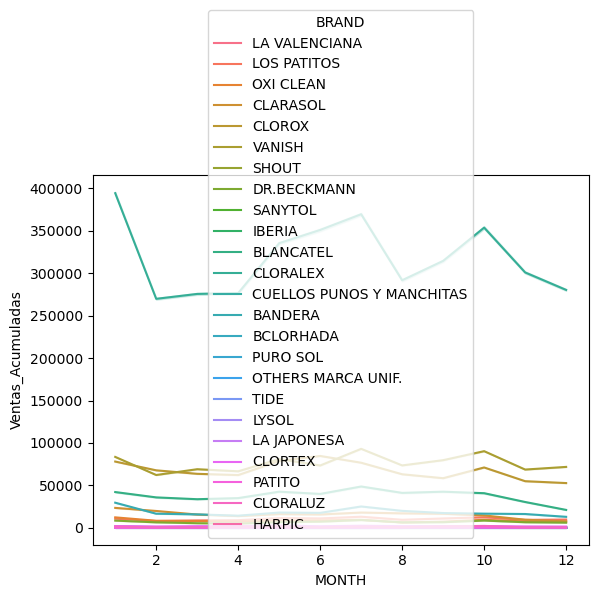

In [66]:
#Filtrando las ventas totales por marca y mes para identificar las marcas lideres

productSales22['Ventas_Acumuladas'] = productSales22.groupby(['MONTH', 'BRAND'])['TOTAL_UNIT_SALES'].cumsum()
productSales23['Ventas_Acumuladas'] = productSales23.groupby(['MONTH', 'BRAND'])['TOTAL_UNIT_SALES'].cumsum()

sns.lineplot(data=productSales22, x="MONTH", y="Ventas_Acumuladas", hue="BRAND")
plt.savefig("VentasAcumuladasMonth22.png", dpi=300, bbox_inches="tight")

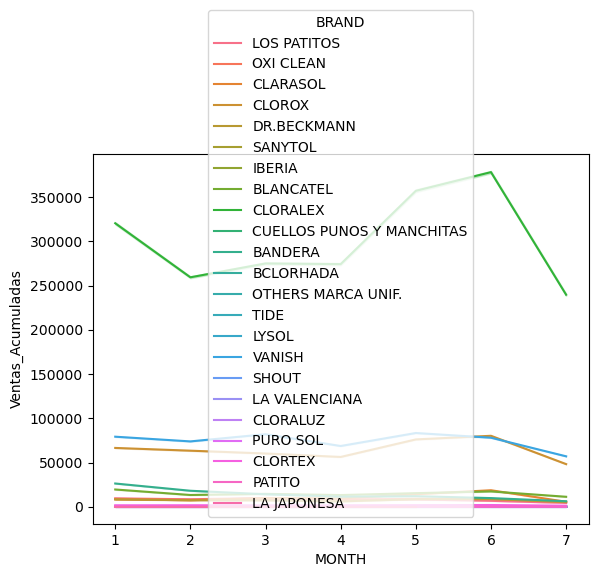

In [67]:
sns.lineplot(data=productSales23, x="MONTH", y="Ventas_Acumuladas", hue="BRAND")
plt.savefig("VentasAcumuladasMonth23.png", dpi=300, bbox_inches="tight")

# Nuevamente se puede apreciar que las ventas por marca a lo largo del año se mantienen relativamente y que las marcas lideres son Cloralex, Vanish y Clorox, siendo Cloralex quien supera a todas por mucho.

C:\Users\BlewOs\AppData\Local\Temp\ipykernel_36132\2629458891.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


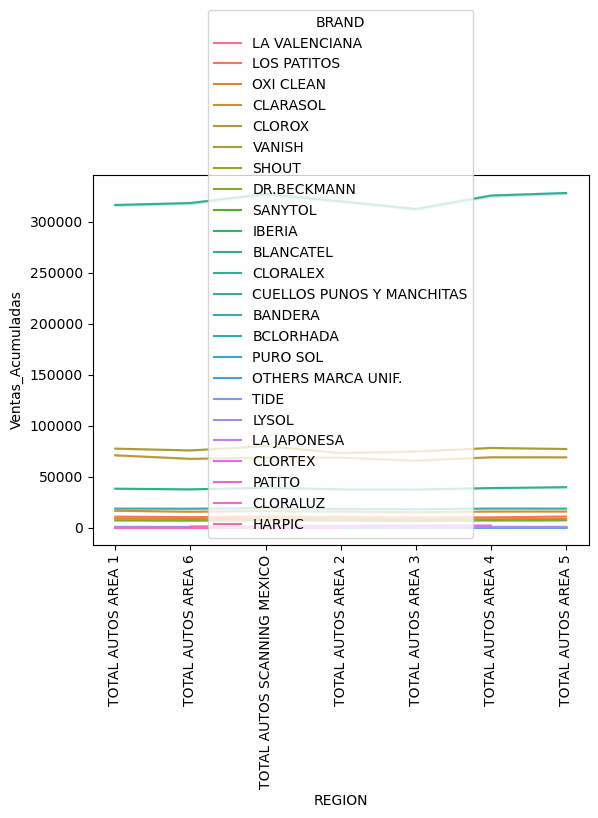

In [68]:
fig, ax = plt.subplots()

sns.lineplot(data=productSales22, x="REGION", y="Ventas_Acumuladas", hue="BRAND")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig("VentasAcumuladasBrand22.png", dpi=300, bbox_inches="tight")

C:\Users\BlewOs\AppData\Local\Temp\ipykernel_36132\2657735269.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


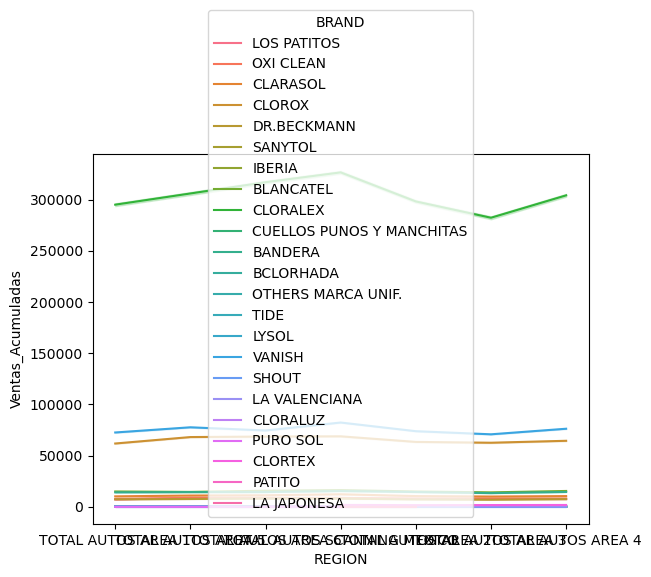

In [69]:
sns.lineplot(data=productSales23, x="REGION", y="Ventas_Acumuladas", hue="BRAND")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig("VentasAcumuladasBrand23.png", dpi=300, bbox_inches="tight")

# Segun las graficas anteriores se puede observar que la media de ventas por marca se mantienen en cantidades bastante similares atravez de las distintas regiones

In [70]:
productSales22['Ventas_Acumuladas_Totales'] = productSales22.groupby(['MONTH', 'REGION'])['TOTAL_UNIT_SALES'].cumsum()
productSales23['Ventas_Acumuladas_Totales'] = productSales23.groupby(['MONTH', 'REGION'])['TOTAL_UNIT_SALES'].cumsum()



C:\Users\BlewOs\AppData\Local\Temp\ipykernel_36132\1312656736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productSales22['Ventas_Acumuladas_Totales'] = productSales22.groupby(['MONTH', 'REGION'])['TOTAL_UNIT_SALES'].cumsum()
C:\Users\BlewOs\AppData\Local\Temp\ipykernel_36132\1312656736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  productSales23['Ventas_Acumuladas_Totales'] = productSales23.groupby(['MONTH', 'REGION'])['TOTAL_UNIT_SALES'].cumsum()


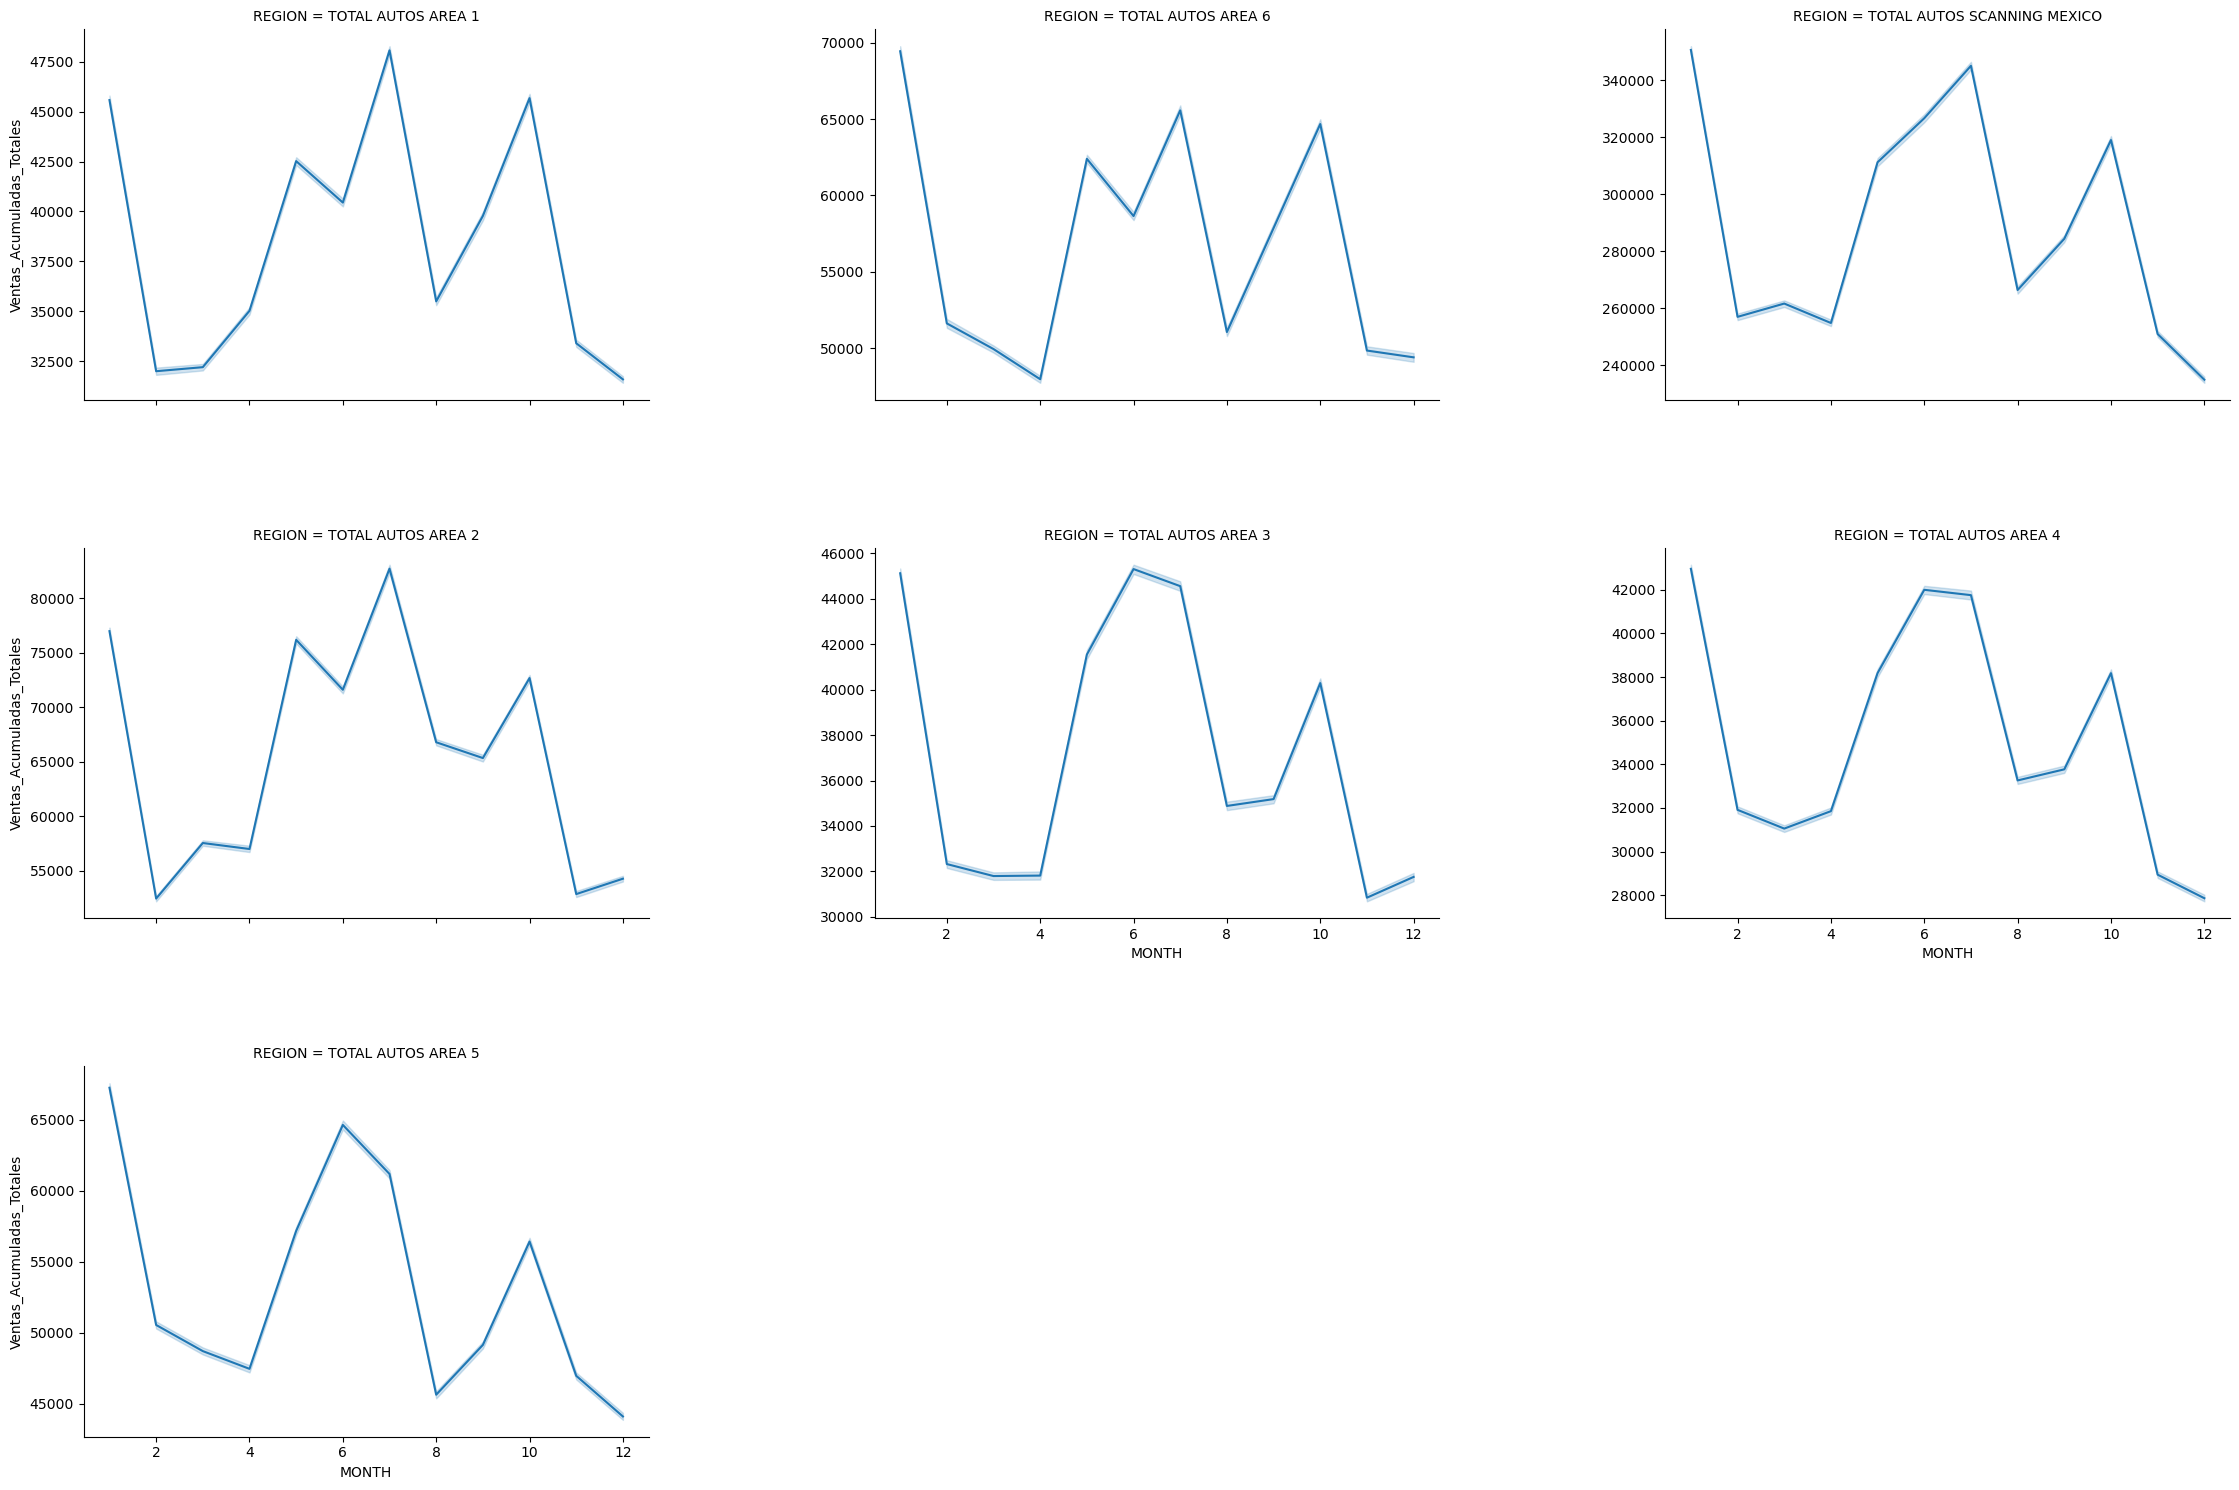

In [71]:
ventasPorRegion = sns.FacetGrid(productSales22, col = "REGION", height=5, aspect=1.5, col_wrap=3, sharey=False)
ventasPorRegion.map(sns.lineplot, "MONTH", "Ventas_Acumuladas_Totales")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
ventasPorRegion.savefig("ventasPorRegion22.png", dpi=300, bbox_inches="tight")

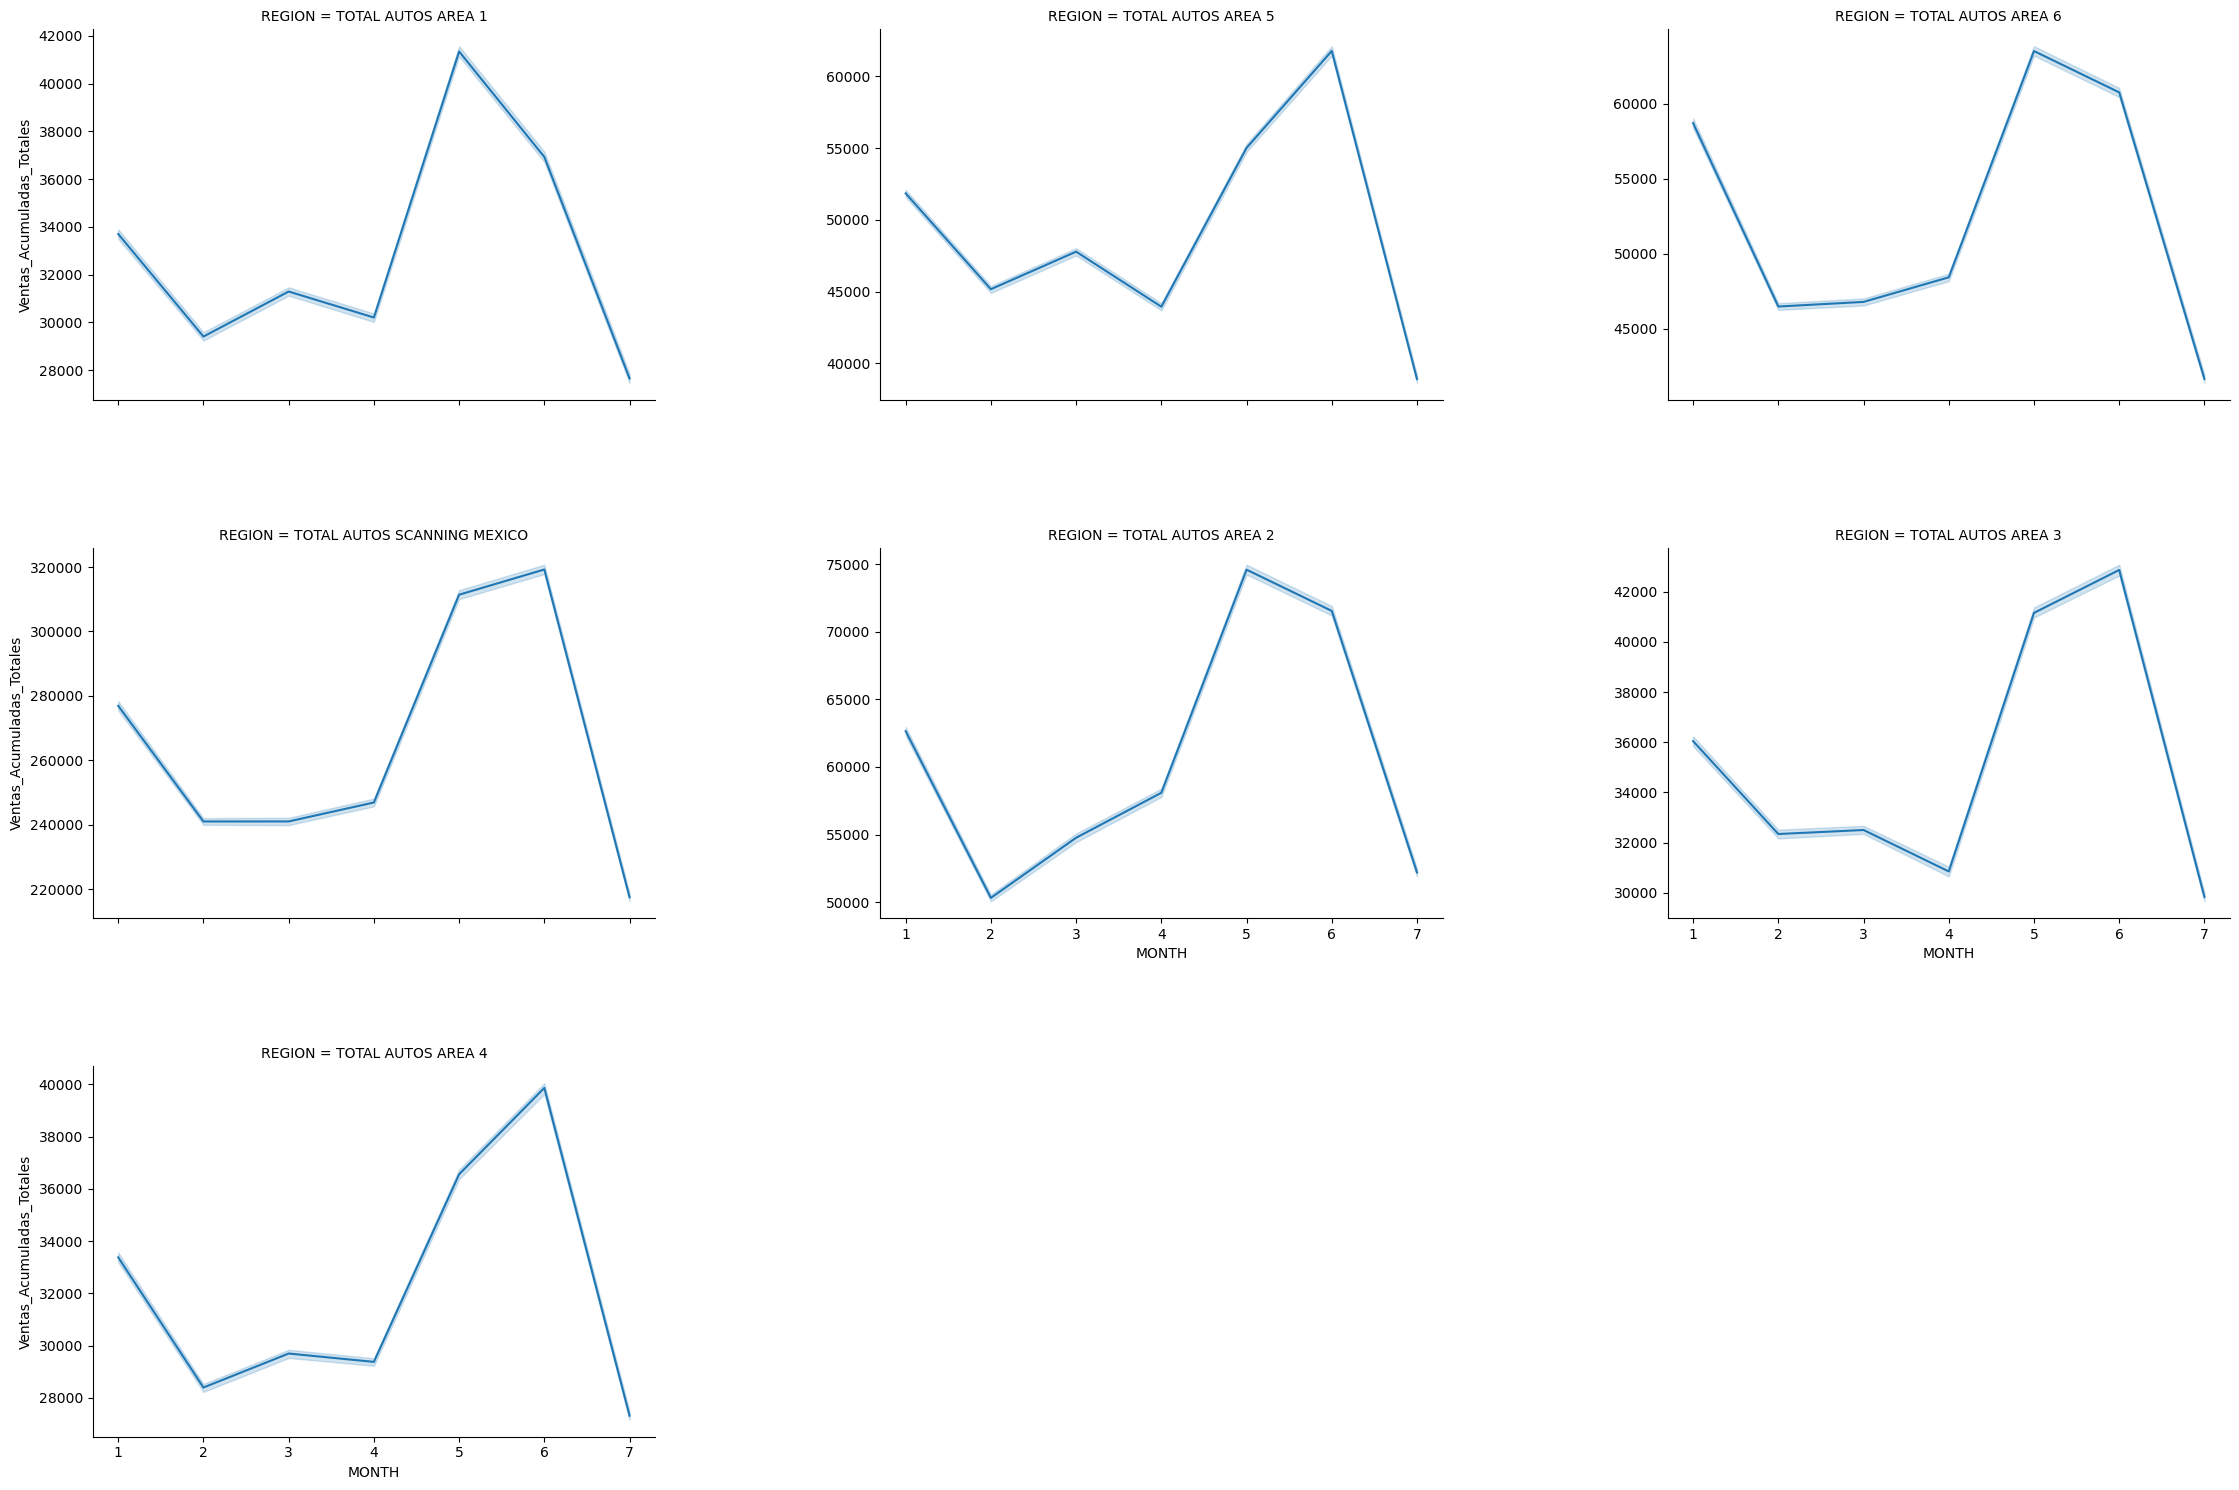

In [72]:
ventasPorRegion = sns.FacetGrid(productSales23, col = "REGION", height=5, aspect=1.5, col_wrap=3, sharey=False)
ventasPorRegion.map(sns.lineplot, "MONTH", "Ventas_Acumuladas_Totales")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
ventasPorRegion.savefig("ventasPorRegion23.png", dpi=300, bbox_inches="tight")

# estos ultimos datos nos indican que ciertamente existen meses donde se realizan mas ventas como lo son los meses 1 y 6 del año 2022 y los meses 5 y 6 del 2023.
# A si mismo se observa que hay otros meses donde caen las ventas como los meses 2, 3 y 4 de ambos años y el mes 12 del 2022

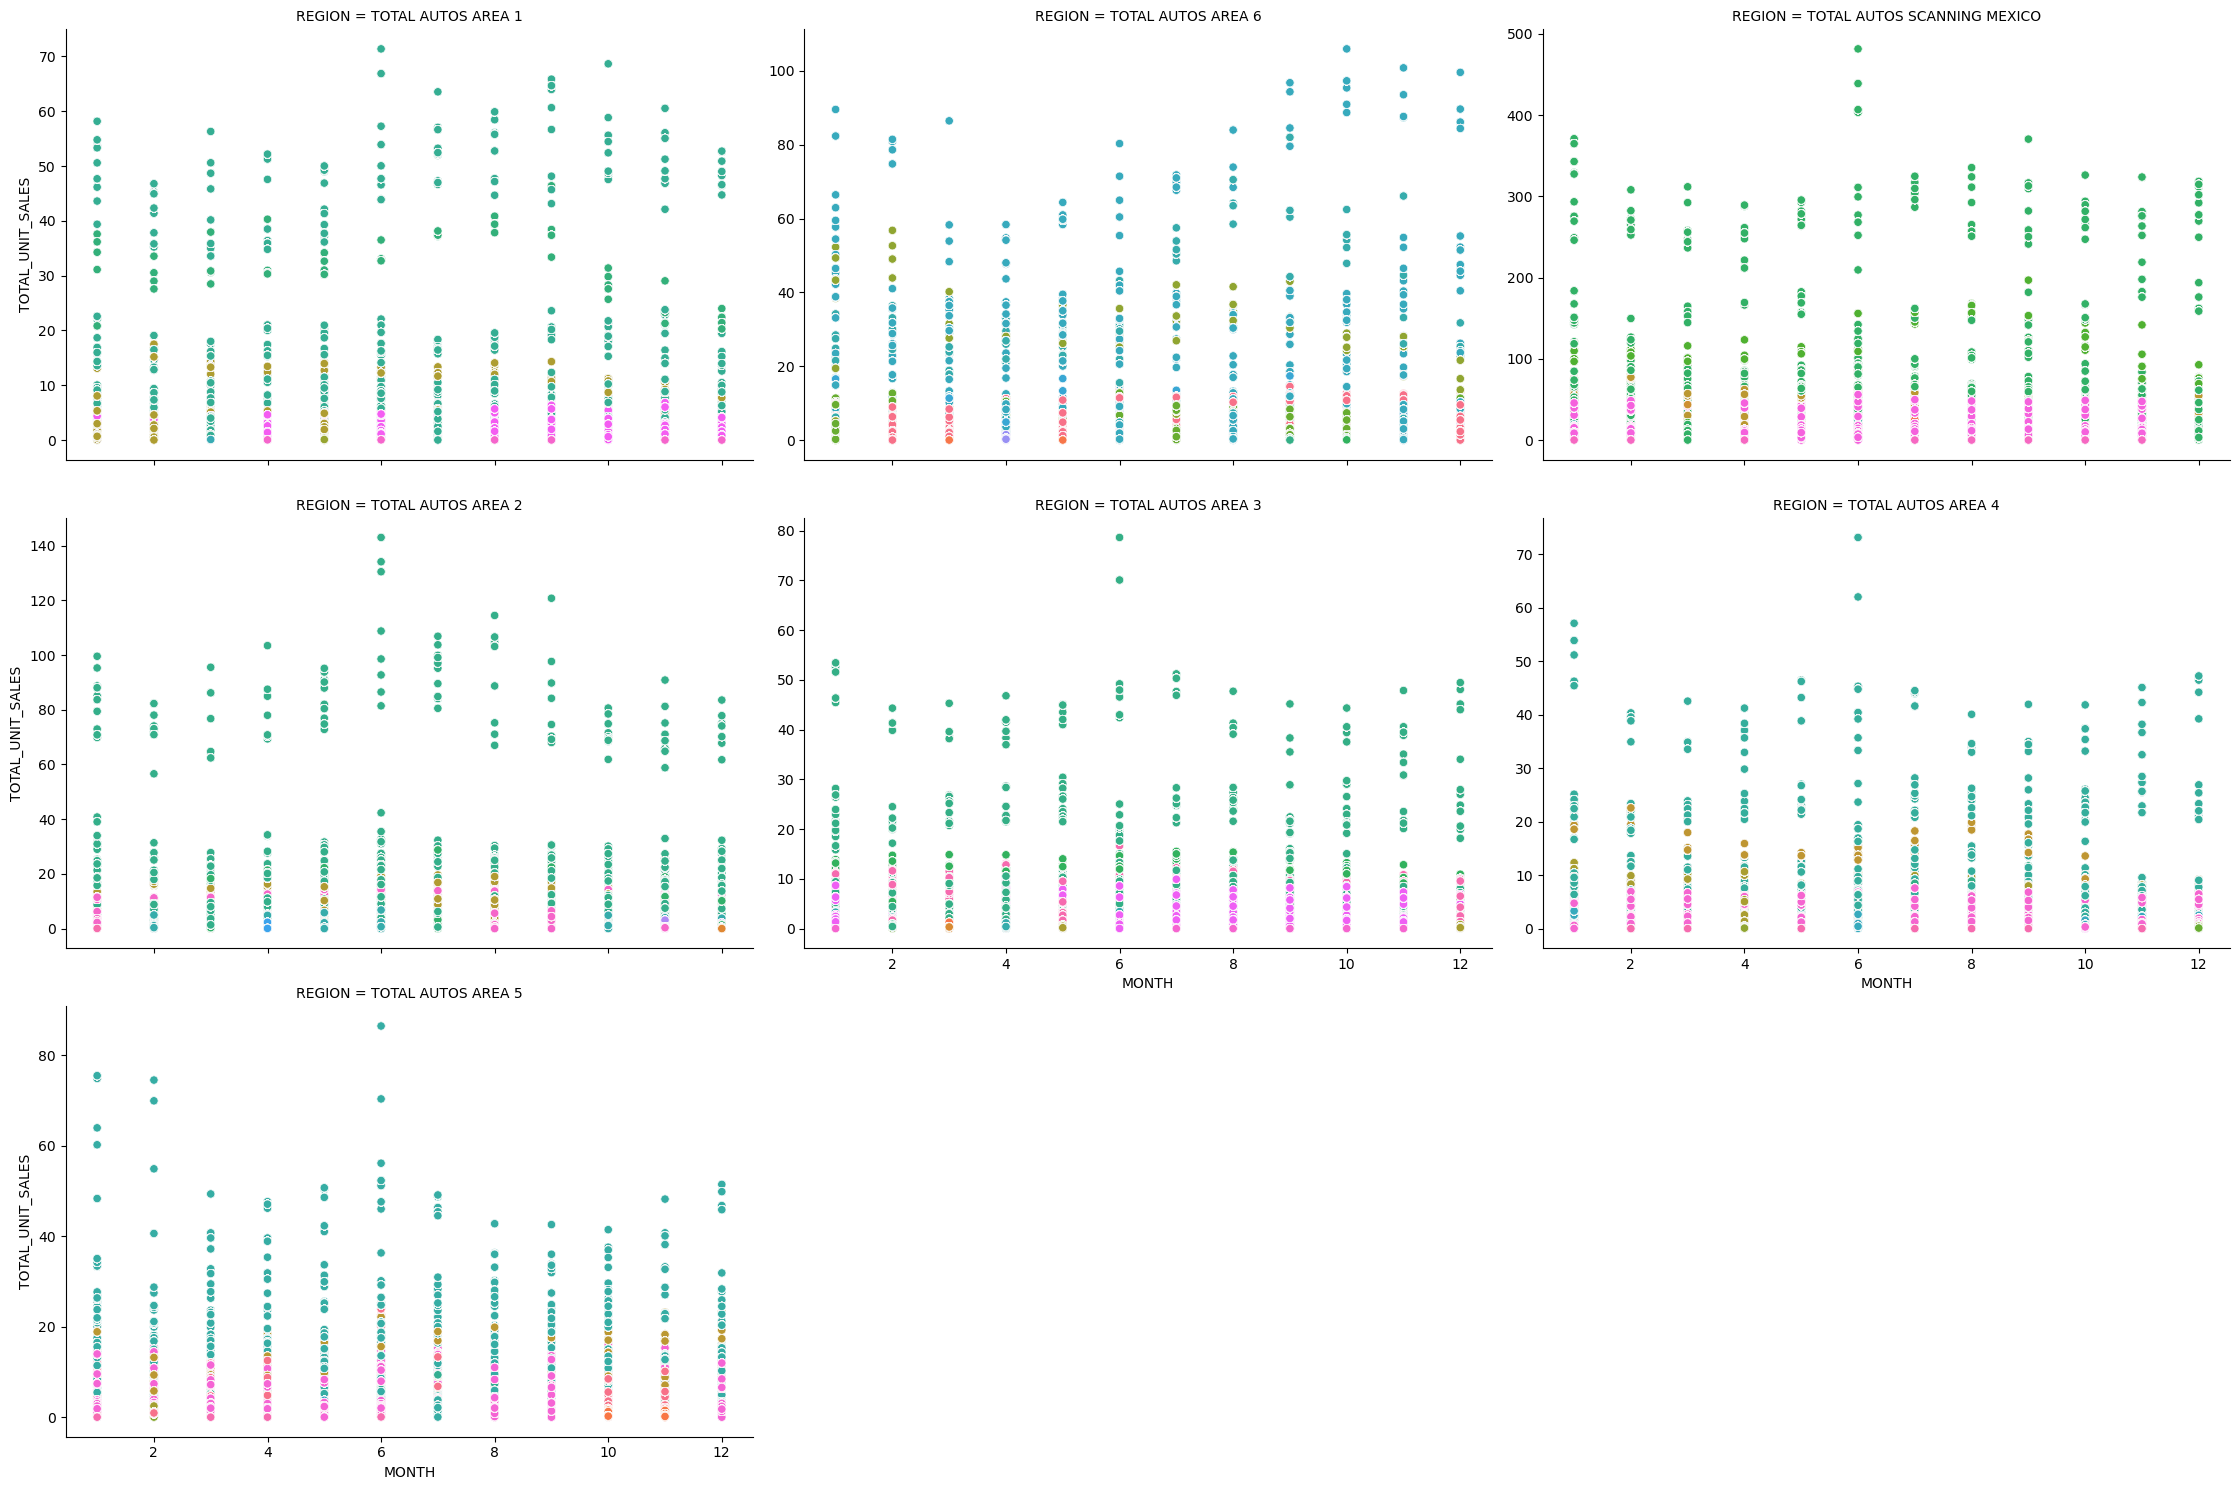

In [73]:
scatterMesUnidades = sns.FacetGrid(productSales22, col = "REGION", height=5, aspect=1.5, col_wrap=3, sharey=False)
scatterMesUnidades.map_dataframe(sns.scatterplot, x="MONTH", y="TOTAL_UNIT_SALES", hue = "BRAND")
for ax in graf.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
scatterMesUnidades.savefig("scatterMesUnidades.png", dpi=300, bbox_inches="tight")

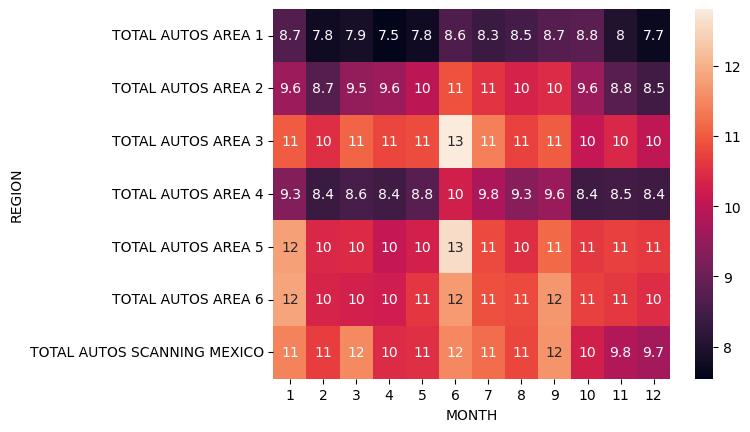

In [74]:
sns.heatmap(pd.crosstab(productSales["REGION"], productSales["MONTH"], values = productSales["TOTAL_UNIT_AVG_WEEKLY_SALES"], aggfunc = "mean"), annot = True)
plt.savefig("PromedioVentasArea.png", dpi=300, bbox_inches="tight")

# En base al mapa anterior se pueden observar las areas con mayor y con menor rendimiento

C:\Users\BlewOs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


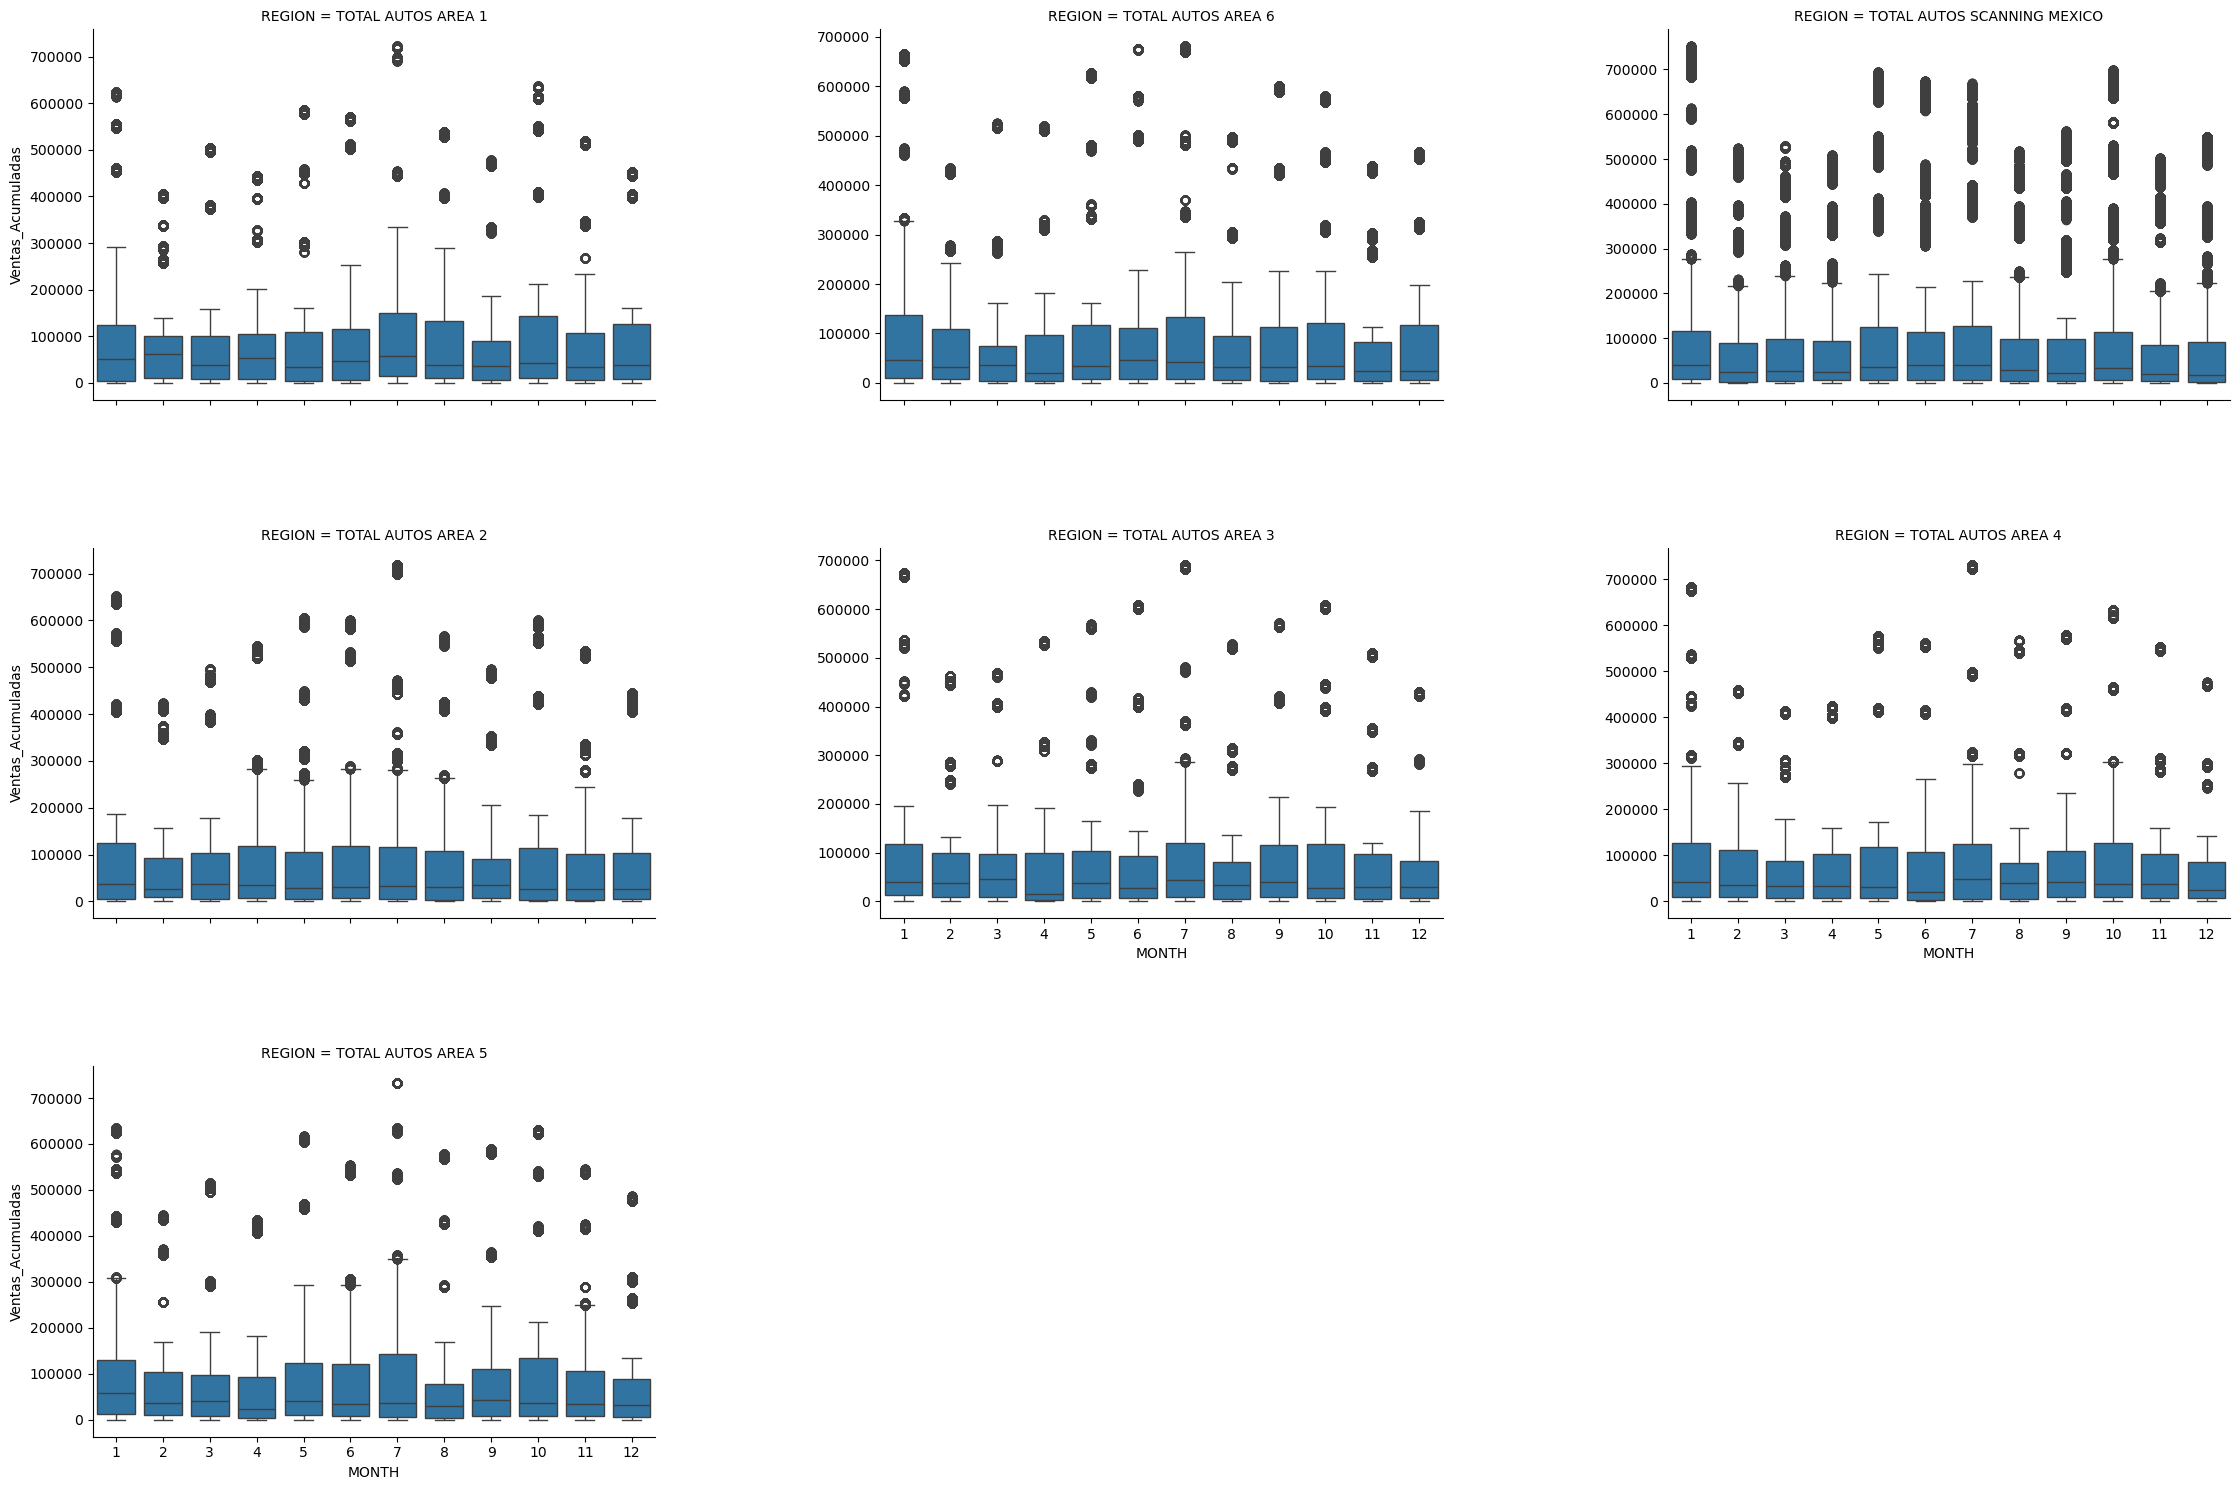

In [75]:
graf = sns.FacetGrid(productSales22, col = "REGION", height=5, aspect=1.5, col_wrap=3, sharey=False)
graf.map(sns.boxplot, "MONTH", "Ventas_Acumuladas")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("TotalSalesMonth22.png", dpi=300, bbox_inches="tight")


C:\Users\BlewOs\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


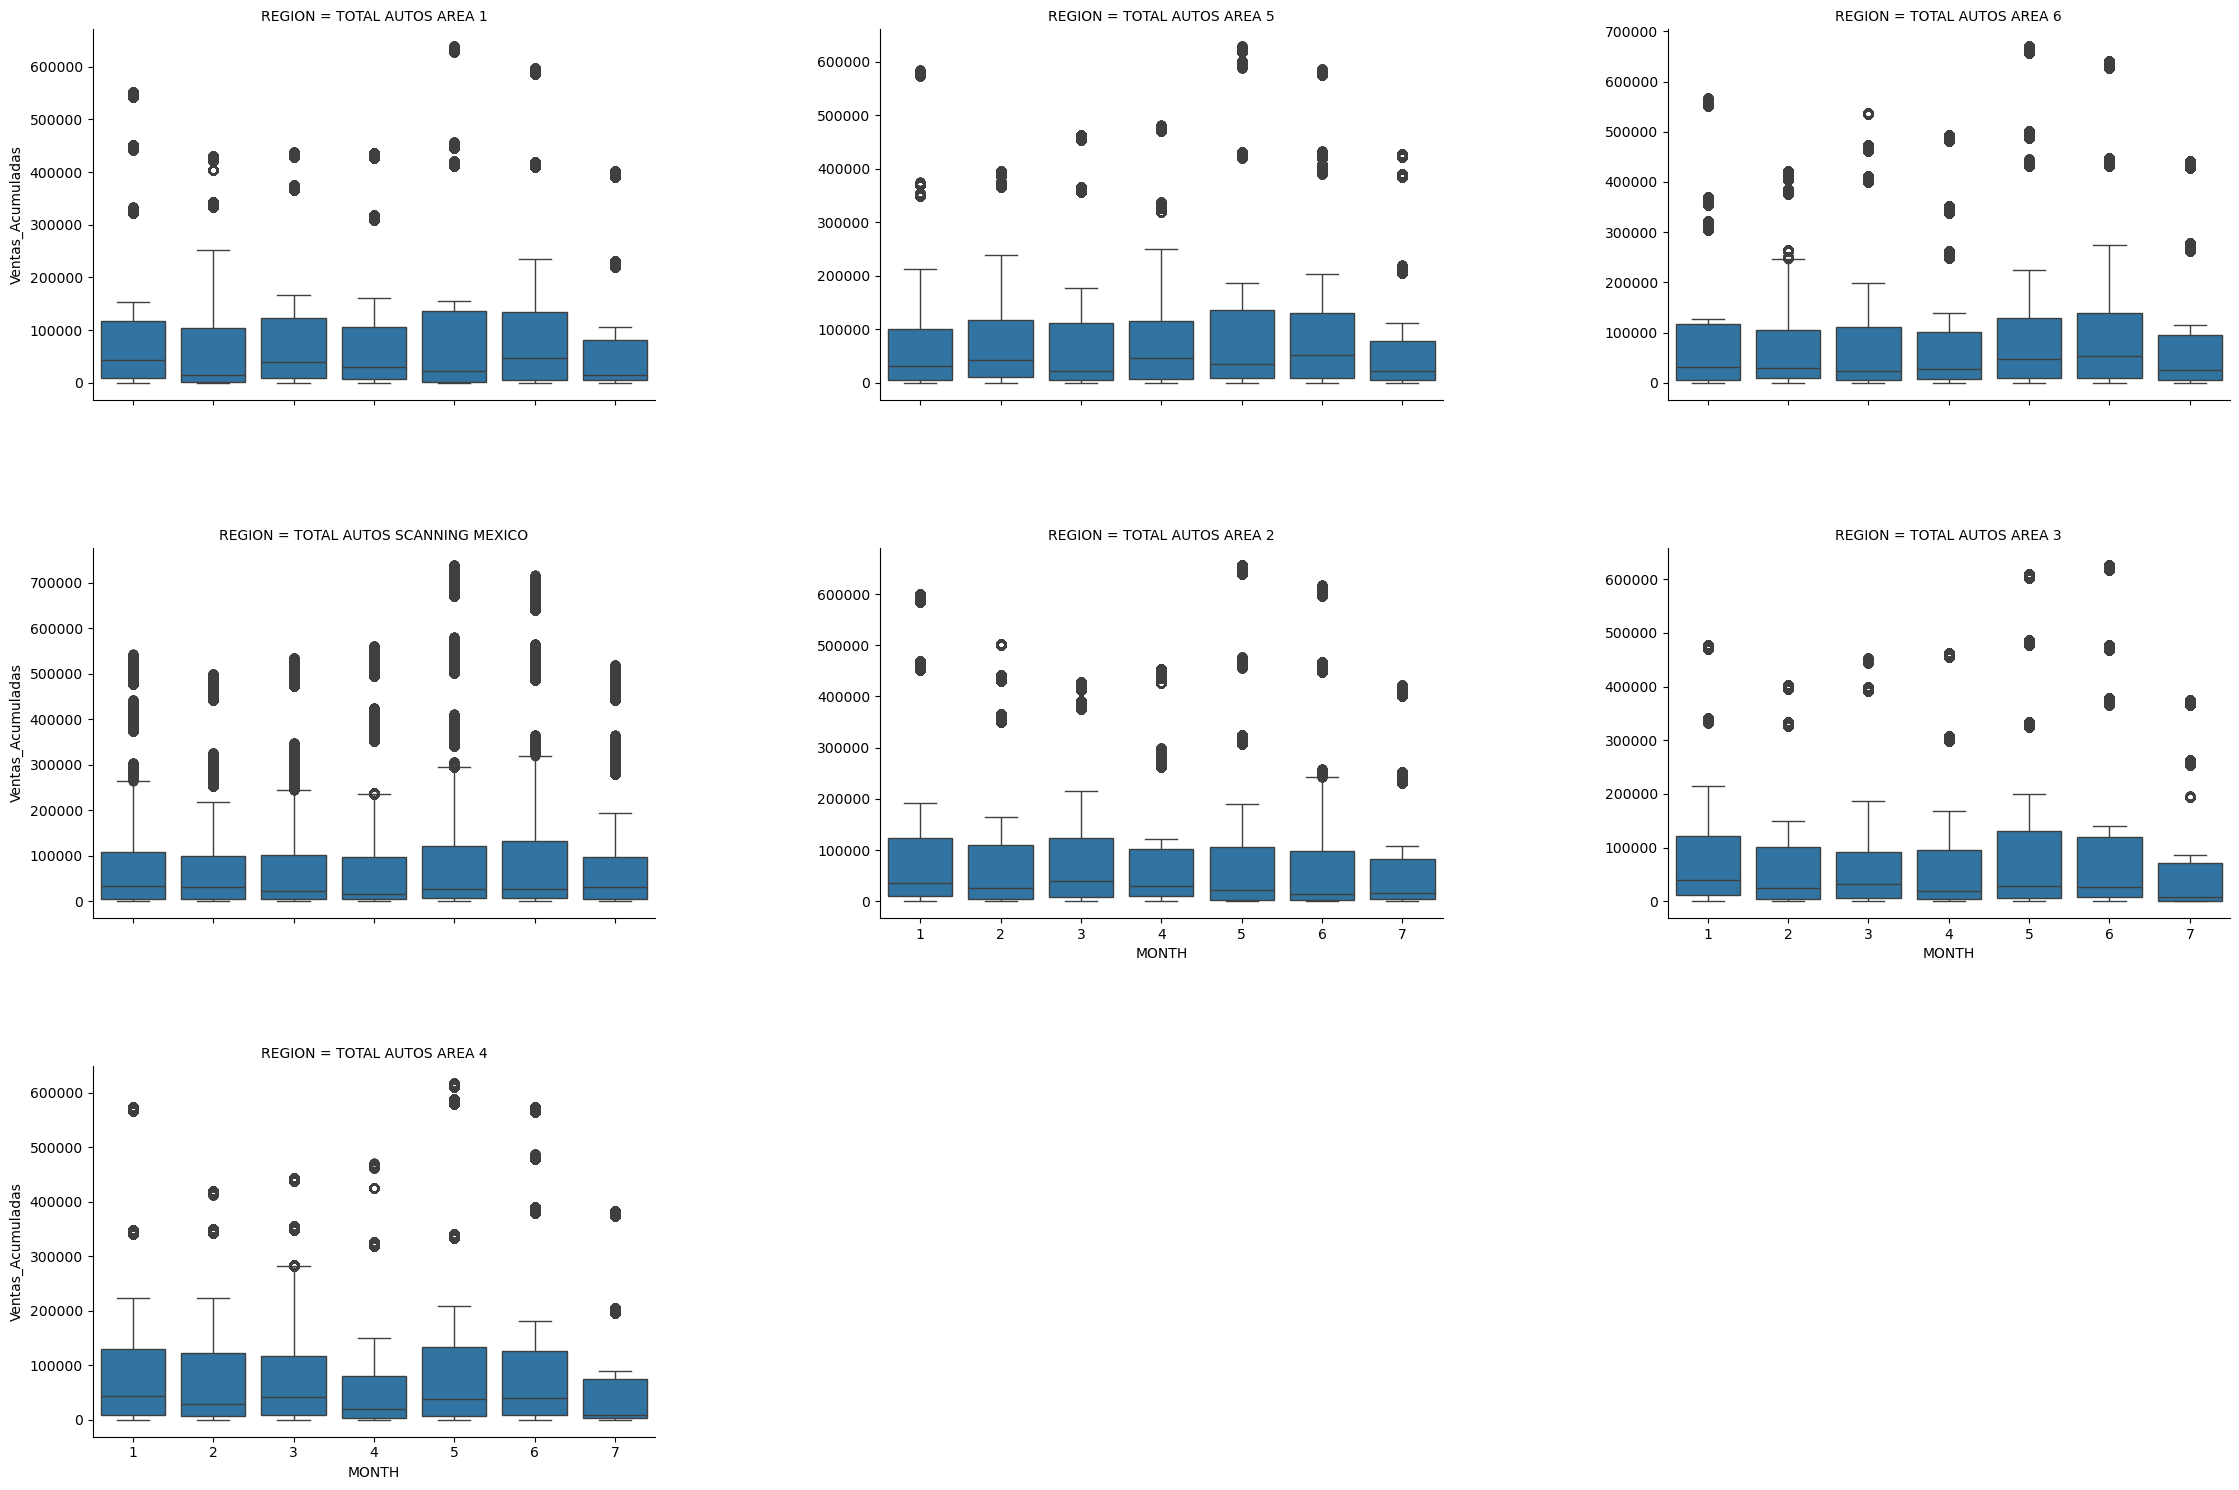

In [76]:
graf = sns.FacetGrid(productSales23, col = "REGION", height=5, aspect=1.5, col_wrap=3, sharey=False)
graf.map(sns.boxplot, "MONTH", "Ventas_Acumuladas")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("TotalSalesMonth23.png", dpi=300, bbox_inches="tight")


# En estas ultimas graficas de forma mas completa la relacion de las ventas totales por region, donde a simple vista se puede ver la relacion con los meses con mas ventas que se observo en otras graficas anteriores y tambien se observan que casos requeririan una mayor atencion devido a la dispercion de sus datos y casos especiales (outliers)